For Lambda 1e-05
	 Hidden Nodes:  10
		 Iteration 1
		 Cost for Iteration  1 is:  3.260891474491085
		 Iteration 5
		 Cost for Iteration  5 is:  3.2607599203898783
		 Iteration 7
		 Cost for Iteration  7 is:  3.2603083200332392
	 Accuracy for:  10 is:  10.27
	 Hidden Nodes:  32
		 Iteration 1
		 Cost for Iteration  1 is:  3.2607087719721677
		 Iteration 5
		 Cost for Iteration  5 is:  3.260682118876588
		 Iteration 7
		 Cost for Iteration  7 is:  3.2610247992879184
	 Accuracy for:  32 is:  10.0
	 Hidden Nodes:  64
		 Iteration 1
		 Cost for Iteration  1 is:  3.260800680569092
		 Iteration 5
		 Cost for Iteration  5 is:  3.260240057360763
		 Iteration 7
		 Cost for Iteration  7 is:  3.260224253477195
	 Accuracy for:  64 is:  10.0
tp 0
tn 0
fp 0
fn 0
Final Accuracy for lambda  1e-05 is:  10.15
For Lambda 0.001
	 Hidden Nodes:  10
		 Iteration 1
		 Cost for Iteration  1 is:  2.4536998454216046
		 Iteration 5
		 Cost for Iteration  5 is:  1.110761393371417
		 Iteration 7
		 Cost for Iterat

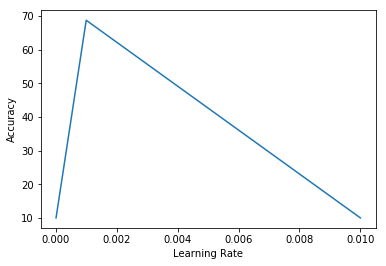

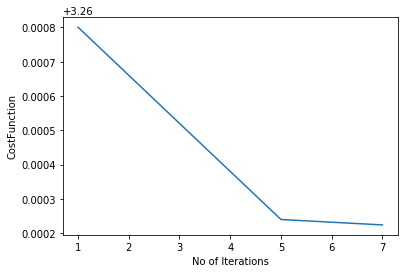

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import util_mnist_reader
import numpy as np
from sklearn.utils.extmath import softmax
import random
from sklearn.utils import shuffle

X_train, y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')

X_train = X_train/255
y_train = y_train
X_test = X_test/255
y_test = y_test

def find_first(item, vec,output_labels):
    for i in range(output_labels-1):
        if item == vec[i]:
            return i
    return -1

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

def convertOutput(y,output_labels):
        #print("b",np.shape(y))
        y_c = np.zeros([y.shape[0],output_labels]) 
        y.reshape(y.shape[0],1)
        for n in range(y.shape[0]):
            b = y[n]    
            y_c[n,b] = 1
        return y_c

def predictAcc(x,y,output_labels,wh,bh,wo,bo,t):
        #print("ACC")
        m = np.size(x, 0)
        o1 = sigmoid(np.dot(x, wh)+bh)
        o2 = softmax(np.dot(o1, wo)+ bo)
        b_c = np.zeros([o2.shape[0],1]) 
        for n in range(o2.shape[0]):
            pred = o2[n,:]
            i = 0
            i = find_first(np.max(pred),pred,output_labels)
            b_c[n,0] = i 
        o2= b_c
        #print("o2")
        #print(o2)
        acc = 0
        c = 0
        w = 0
        tn =0
        tp =0
        fn =0
        fp =0
        for j in range(m):
            if o2[j] == 1 and y[j] == 1:
                tp=tp+1
            elif o2[j] == 0 and y[j] == 0:
                tn = tn+1
            elif o2[j] == 0 and y[j] == 1:
                fn = fn +1
            elif o2[j] == 1 and y[j] == 0:
                fp = fp +1
        for n in range(m):
            if y[n] == o2[n]:
                c = c+1
        acc = (c / (m))*100
        if t==1:
            print("tp",tp)
            print("tn",tn)
            print("fp",fp)
            print("fn",fn)
        #print("Y", y)
        #print("o2", o2)
        return acc
    
def convertZeroOne(c):
    for n in range(np.size(c,0)):
        if c[n] is 0:
            c[n] = 0.000001
        elif c[n] is 1:
            c[n] = 0.999999
    return c
    
def costFunction(y,a2,wh,wo,lamba):
    
    m = np.size(a2, 0)
    B1 = np.log((a2))
    B2 = np.log((1-a2))
    B3 = y
    B4 = 1-y
        
    T1 = (-1)*np.multiply(B3,B1)
    T2 = (-1)*np.multiply(B2,B4)
    R1 = np.add(T1,T2)
    P1 = (sum(sum(R1 , 2))/m)
        
    wt1 = wh
    T3 = np.square(wt1) 
    a = T3[0,0]
    P2 = np.sum(T3)-a
    wt2 = wo
    T5 = np.square(wt2)
    b = T5[0,0]
    P3 = np.sum(T5)-b
        
    J = P1 + ((lamba/(2*m)) * (P2 + P3))
    J = P1
    return J
        
instances = X_train.shape[0]
attributes = X_train.shape[1]
hidden_nodesA = np.array([10,32,64])
output_labels = 10


lambaA = np.array([10e-6,10e-4,10e-3])
lambaSet = np.size(lambaA)
noItr = np.array([1,5,7])
numitr = np.size(noItr)
accuracyL = np.zeros([1,lambaSet])
costI = np.zeros([lambaSet,numitr])
                       
for l in range(lambaSet):
    
    lr = lambaA[l]
    print("For Lambda",lr)
    for kn in range(np.size(hidden_nodesA)):
        print("\t Hidden Nodes: ", hidden_nodesA[kn])
        hidden_nodes = hidden_nodesA[kn]
        wh = np.random.rand(attributes,hidden_nodes)/1000
        bh = np.random.randn(hidden_nodes)/1000
        wo = np.random.rand(hidden_nodes,output_labels)/1000
        bo = np.random.randn(output_labels)/1000
        maxacc = 0.00
        maxwh = np.zeros([attributes,hidden_nodes])
        maxwo = np.zeros([hidden_nodes,1])
        maxbh = np.zeros([hidden_nodes,output_labels])
        maxbo = np.zeros([output_labels,1])

        for r in range(numitr):
                numberOfIterations = noItr[r]
                print('\t\t Iteration {}'.format(numberOfIterations))

                for k in range(numberOfIterations):
                    minibatch_size = 2000
                    for j in range(0, X_train.shape[0], minibatch_size):
                        #print("MINI BATCH SET: \n",j)
                        
                        X_train, y_train = shuffle(X_train, y_train)

                        X_train_mini = X_train[j:j + minibatch_size]
                        y_train_mini = y_train[j:j + minibatch_size]
                        m = X_train_mini.shape[0]
                        zh = np.dot(X_train_mini, wh) + bh
                        ah = sigmoid(zh)
                        zo = np.dot(ah, wo) + bo
                        ao = softmax(zo)
                        dcost_dzo = ao - convertOutput(y_train_mini,output_labels)
                        dzo_dwo = ah
                        dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)
                        dcost_bo = dcost_dzo
                        dzo_dah = wo
                        dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
                        dah_dzh = sigmoid_der(zh)
                        dzh_dwh = X_train_mini
                        dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)
                        dcost_bh = dcost_dah * dah_dzh
                        wh -= lr * dcost_wh
                        bh -= lr * (dcost_bh).sum(axis=0)
                        wo -= lr * dcost_wo
                        bo -= lr * (dcost_bo).sum(axis=0)
                        if j % minibatch_size == 0:
                            #print("\t Minibatch Size:", j / minibatch_size)
                            loss = costFunction(convertOutput(y_train_mini,output_labels),ao,wh,wo,lr)
                            #print('\t\t Loss function for Minibatch value: ', loss)
                            acc = predictAcc(X_train_mini,y_train_mini,output_labels,wh,bh,wo,bo,0)
                            #print("\t\t ACCURACY IS",acc)

                costI[l,r] = loss
                print("\t\t Cost for Iteration ",numberOfIterations,"is: ",costI[l,r])
        print("\t Accuracy for: ",hidden_nodes,"is: ",predictAcc(X_test,y_test,output_labels,wh,bh,wo,bo,0))
    accuracyL[0,l]=predictAcc(X_test,y_test,output_labels,wh,bh,wo,bo,1)
    print("Final Accuracy for lambda ",lr,"is: ",acc)

lambaA= lambaA.reshape(lambaSet)
accuracyL = accuracyL.reshape(lambaSet)
plt.plot(lambaA,accuracyL)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()

costf= costI[0,:]
noItr = noItr.reshape(numitr)
costf = costf.reshape(numitr)
plt.plot(noItr, costf)
plt.xlabel('No of Iterations')
plt.ylabel('CostFunction')
plt.show()






In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import util_mnist_reader
import numpy as np
from sklearn.utils.extmath import softmax
import random
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from keras.callbacks import TensorBoard
import os
print(tf.VERSION)
print(tf.keras.__version__)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 


x_train, y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
x_test, y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255



class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Train Image Set Size: ",x_train.shape)
print("Train Labels Set Size: ",y_train.shape)
print("Test Image Set Size: ",x_test.shape)
print("Test Labels Set Size: ",y_test.shape)

model = models.Sequential()
fc = layers.Dense(128, activation='sigmoid', input_dim=784)
fc2 = layers.Dense(128 ,activation='relu')
output = layers.Dense(10, 'softmax')
model.add(fc)
model.add(fc2)
model.add(output)
model.summary()
model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30,
         batch_size=128,
         validation_data=(x_test,y_test),
         )
test_loss, test_accuracy = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
print("Confusion matrix is\n", cm)
print(test_accuracy)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os
print(tf.VERSION)
print(tf.keras.__version__)
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist = keras.datasets.fashion_mnist
from sklearn.metrics import confusion_matrix 

#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


train_images, train_labels = util_mnist_reader.load_mnist('data/fashion', kind='train')
test_images, test_labels = util_mnist_reader.load_mnist('data/fashion', kind='t10k')

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Train Image Set Size: ",train_images.shape)
print("Train Labels Set Size: ",train_labels.shape)
print("Test Image Set Size: ",test_images.shape)
print("Test Labels Set Size: ",test_labels.shape)


train_images = train_images.reshape((60000, 28,28, 1))
test_images = test_images.reshape((10000, 28,28, 1))
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

# First convolutional layer. 
# Number of neurons = 32
# filter(kernel) size = 3x3
# Activation function = Relu
# input data (images) size (height, width, channels) = (28, 28, 1)
# Channels is 'colors' here. Since fashion MNIST images are grayscale, number of colors = 1, hence, channels = 1

conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) )

# Second convolutional layer. 
# Number of neurons = 64
# filter(kernel) size = 3x3
# Activation function = Relu
# No separate input data for this layer, input to this layer are the 'weights' of the conv1 layer featureMaps
# no need to specify explicitly the input to the other convolutional layers (except for the first layer, as above)

conv2 = layers.Conv2D(64, (3,3), activation='relu')

# Second convolutional layer. 
# Number of neurons = 128
# filter(kernel) size = 3x3
# Activation function = Relu
# No separate input data for this layer, input to this layer are the 'weights' of the conv2 layer featureMaps
# no need to specify explicitly the input to the other convolutional layers (except for the first layer, as above)

conv3 = layers.Conv2D(128, (3,3), activation='relu')

# Max Pool Layer
# Since input to CNN is a 2-D image and ouput from last convolutional layer (featuerMap) is also 2-D array 
# (except the third dimension i.e. channels), we will use 2D version of Max Pooling function of TensorFlow Keras
# to create a Max Pooling Layer, as shown below filter (kernel) size for Pooling Layer = 2x2

#Creating first Max. Pooling Layer
max_pool_1 = layers.MaxPooling2D((2,2))

#Creating second Max. Pooling Layer
max_pool_2 = layers.MaxPooling2D((2,2))

#Creating third Max. Pooling Layer
max_pool_3 = layers.MaxPooling2D((2,2))

# Fully Connected (FC) Layer i.e. hidden layer expects input in 1-D format (1-D array), hence, we need to convert
# 2-D output (2-D array) of last convolutional layer (conv3) to 1-D array i.e. we need to flatten the 2-D array
# to 1-D array

flat_layer = layers.Flatten()
# Fully Connected (FC) Layer - Hidden(Dense) Layer
# Normally, the number of neurons that we keep in FC layer should be equal to the number of neurons in just
# immediate previous convolutional layer

fc = layers.Dense(128, activation='relu')
output = layers.Dense(10, 'softmax')
modeln = models.Sequential()

modeln.add(conv1)
modeln.add(conv2)
modeln.add(conv3)
modeln.add(max_pool_1)
modeln.add(flat_layer)
modeln.add(fc)
modeln.add(output)
modeln.summary()
modeln.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
modeln.fit(train_images_norm, train_labels, epochs=35, batch_size=512, shuffle=True, validation_split=0.1)

test_loss, test_accuracy = modeln.evaluate(test_images_norm, test_labels)
y_pred = modeln.predict(test_images)
cm = confusion_matrix(test_labels, y_pred.argmax(axis=1))
print("Confusion matrix is\n", cm)
print(test_accuracy)